<a href="https://colab.research.google.com/github/unique-subedi/gene-expression/blob/main/Unique_gene_expression_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import os
import datetime
import time
import math
import numpy as np
import scipy
from numpy import linalg as LA
import pandas as pd
import urllib.request
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
!pip install pyreadr
import pyreadr
urllib.request.urlretrieve("https://raw.githubusercontent.com/unique-subedi/gene-expression/main/data/brain.rda", "brain.rda")
brain = pyreadr.read_r("brain.rda")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 363 kB 5.0 MB/s 


In [ ]:
expression = pd.DataFrame(brain["expression"])
genes = pd.DataFrame(brain["genes"])
samples = pd.DataFrame(brain["samples"])
genes_c = genes[(pd.isna(genes.sym)) & (pd.isna(genes.chrom))]

In [ ]:
expression.head()
genes.head()
samples.iloc[:20,:]

,patient,sex,region,lab,chip.version
rownames,,,,,
01_a_D_f_2.CEL,patient_01,female,A.C. cortex,Davis,v2
01_a_I_f_2.CEL,patient_01,female,A.C. cortex,Irvine,v2
01_a_M_f_1.CEL,patient_01,female,A.C. cortex,Michigan,v1
01_c_D_f_1.CEL,patient_01,female,cerebellum,Davis,v1
01_c_I_f_2.CEL,patient_01,female,cerebellum,Irvine,v2
01_c_M_f_1.CEL,patient_01,female,cerebellum,Michigan,v1
01_d_I_f_2.CEL,patient_01,female,D.L.P.F. cortex,Irvine,v2
01_d_M_f_1.CEL,patient_01,female,D.L.P.F. cortex,Michigan,v1
02_a_I_m_2.CEL,patient_02,male,A.C. cortex,Irvine,v2


`michigan` dataset contains the measurements, done at University of Michigan lab, of anterior cortex and dorsolateral cortex for each patient. 

`michigan_diff` subtracts measurement of anterior cortex from the dorsolateral cortex for each patient.

# Michigan

In [148]:
michigan = expression[(expression.index.str[5] == 'M') & (expression.index.str[3] != 'c') ]
#michigan = michigan.sub(michigan[genes_c.index].iloc[:, -4:-1].mean(axis =1), axis = 0) 
michigan.head()

,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,AFFX-hum_alu_at
01_a_M_f_1.CEL,6.852731,5.298974,5.033266,6.040661,5.890083,5.810144,5.098923,6.240855,7.280948,6.124910,...,5.374457,5.165619,5.032617,5.382904,5.509690,5.113946,5.273243,5.321357,5.321636,12.856782
01_d_M_f_1.CEL,8.536238,6.377525,5.988068,7.197371,6.872508,6.971540,5.989707,8.069161,8.405470,8.177704,...,6.106663,5.882787,5.633184,6.096874,6.086164,5.817399,5.949295,5.912779,6.085618,13.919305
02_a_M_m_1.CEL,7.721345,5.812886,5.665446,6.681512,6.460790,6.633041,5.681871,7.213198,8.216999,8.129531,...,5.740565,5.586448,5.305129,5.665204,5.749193,5.486531,5.478960,5.556478,5.719656,12.892129
02_d_M_m_1.CEL,8.717736,6.356920,6.024032,7.365431,7.048703,7.617187,6.031630,8.206457,9.307843,9.494339,...,6.334917,6.019027,5.680641,6.181441,6.170813,6.020416,5.959995,5.909426,6.163633,13.616167
03_a_M_f_1.CEL,7.789601,5.819901,5.609659,6.635914,6.391285,6.589685,5.490427,7.162257,8.115873,8.253429,...,5.690435,5.479970,5.187084,5.551950,5.661011,5.469054,5.439493,5.465072,5.613659,12.860593


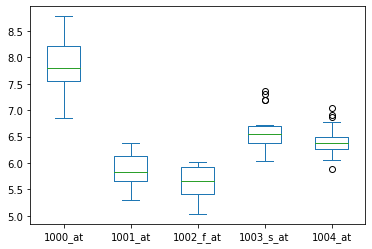

In [145]:
michigan[genes_c.index].iloc[:, -20:]

,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-MurFAS_at,AFFX-MurIL10_at,AFFX-MurIL2_at,AFFX-MurIL4_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,AFFX-hum_alu_at
01_a_M_f_1.CEL,5.927045,7.874882,5.418592,5.571496,5.614787,5.145705,6.551353,5.103729,5.332784,5.616484,5.374457,5.165619,5.032617,5.382904,5.509690,5.113946,5.273243,5.321357,5.321636,12.856782
01_d_M_f_1.CEL,7.239697,9.151257,6.094247,6.288610,6.386091,5.763508,7.289075,5.705057,6.069817,6.397030,6.106663,5.882787,5.633184,6.096874,6.086164,5.817399,5.949295,5.912779,6.085618,13.919305
02_a_M_m_1.CEL,6.480937,7.950605,5.621956,5.833330,6.041147,5.355806,6.830075,5.351777,5.521471,5.956193,5.740565,5.586448,5.305129,5.665204,5.749193,5.486531,5.478960,5.556478,5.719656,12.892129
02_d_M_m_1.CEL,7.102669,8.948198,6.132280,6.477677,6.631725,5.791944,7.342361,5.809374,6.033544,6.587861,6.334917,6.019027,5.680641,6.181441,6.170813,6.020416,5.959995,5.909426,6.163633,13.616167
03_a_M_f_1.CEL,6.279809,8.070342,5.625344,5.876491,6.076859,5.381352,6.743786,5.336531,5.580224,5.890475,5.690435,5.479970,5.187084,5.551950,5.661011,5.469054,5.439493,5.465072,5.613659,12.860593
03_d_M_f_1.CEL,7.337611,8.982811,6.030153,6.406390,6.546086,5.714910,7.265381,5.722756,5.975006,6.543778,6.195142,5.932430,5.565980,6.003753,6.017589,5.905215,5.948662,5.944310,6.099501,13.624417
04_a_M_m_1.CEL,6.263937,7.917218,5.687282,5.868321,6.123173,5.444875,6.843614,5.400750,5.662786,5.867232,5.841194,5.587379,5.358170,5.725782,5.794067,5.570791,5.580149,5.468514,5.647249,12.810498
04_d_M_m_1.CEL,6.790346,8.864782,5.997438,6.359208,6.480933,5.735869,7.267529,5.708806,6.032996,6.432256,6.173733,5.898971,5.567409,6.061674,6.049983,5.841303,5.923077,5.732800,5.989274,13.797401
05_a_M_m_1.CEL,6.829246,8.095912,5.547662,5.732649,5.893092,5.317777,6.706223,5.227699,5.515030,5.867941,5.633823,5.425130,5.208835,5.551948,5.669835,5.380874,5.394249,5.415527,5.506632,12.932138
05_d_M_m_2.CEL,6.512406,8.244381,5.782248,6.108827,6.395012,5.865698,6.989853,5.751869,6.005847,6.187873,6.030000,5.791532,5.741764,5.885389,5.957301,5.809724,5.759710,5.878036,5.920867,12.868977


In [151]:
irvine = expression[(expression.index.str[5] == 'I') & (expression.index.str[3] != 'c') ]
#irvine = irvine.sub(irvine[genes_c.index].iloc[:,-4:-1].mean(axis =1), axis = 0) 
irvine.head()

,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,AFFX-hum_alu_at
01_a_I_f_2.CEL,10.930684,9.455482,9.233291,9.777128,9.612399,9.845444,9.149639,10.580062,11.505571,9.846817,...,9.366604,9.067484,8.945584,9.118070,9.137492,9.067202,9.129742,9.256544,9.171725,15.494106
01_d_I_f_2.CEL,11.393286,9.651953,9.270837,9.935413,9.821868,10.150137,9.197184,11.097690,11.473083,10.502210,...,9.501124,9.157044,9.075516,9.259168,9.267098,9.207221,9.226452,9.269336,9.378823,15.494043
02_a_I_m_2.CEL,11.286309,9.534825,9.245450,9.974705,9.853996,10.346425,9.190672,10.994508,11.912161,11.007516,...,9.343671,9.092941,9.036289,9.234873,9.315702,9.222829,9.170471,9.452392,9.352455,15.494356
02_d_I_m_2.CEL,12.223467,10.235448,9.956889,10.743736,10.478109,11.141714,9.878801,11.835688,12.252239,12.207664,...,10.750714,10.447762,10.213404,10.521001,10.399619,9.892502,9.823687,10.002157,10.036467,15.493762
03_a_I_f_2.CEL,11.753982,9.777141,9.512854,10.317117,10.096863,10.624825,9.439641,11.483041,11.955654,11.572875,...,9.480548,9.376379,9.207477,9.441223,9.487832,9.338569,9.354791,9.415267,9.415149,15.494137


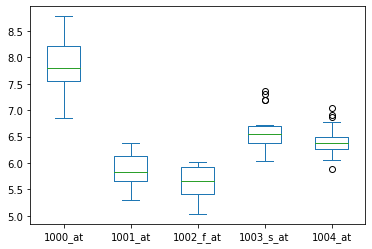

In [152]:
michigan.iloc[:, :5].plot(kind = 'box')

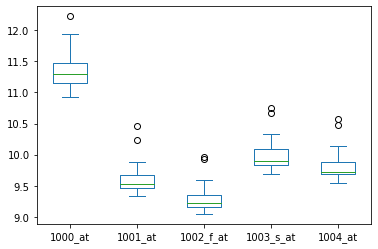

In [153]:
irvine.iloc[:, :5].plot(kind = 'box')

In [154]:
michigan = michigan.sub(michigan[genes_c.index].iloc[:, -4:-1].mean(axis =1), axis = 0)
irvine = irvine.sub(irvine[genes_c.index].iloc[:,-4:-1].mean(axis =1), axis = 0) 

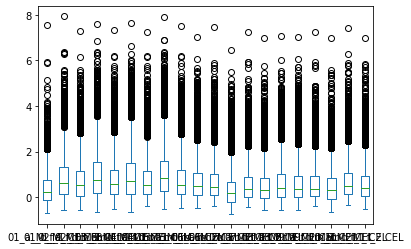

In [157]:
michigan.T.plot(kind = 'box')

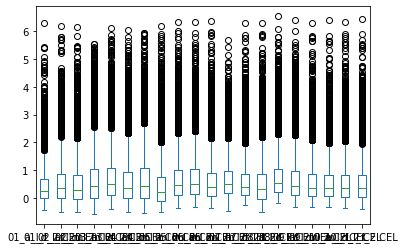

In [158]:
irvine.T.plot(kind = 'box')

In [133]:
michigan_diff = michigan.diff().iloc[1::2,:]
michigan_diff.index = "patient" + michigan_diff.index.str[:2]
michigan_diff.head()

,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,AFFX-hum_alu_at
patient01,1.683506,1.078551,0.954802,1.156709,0.982425,1.161395,0.890784,1.828306,1.124522,2.052794,...,0.732205,0.717167,0.600567,0.713971,0.576473,0.703452,0.676053,0.591423,0.763982,1.062522
patient02,0.996391,0.544034,0.358586,0.683919,0.587913,0.984146,0.349759,0.993259,1.090844,1.364808,...,0.594352,0.432579,0.375512,0.516236,0.421621,0.533885,0.481034,0.352948,0.443977,0.724038
patient03,0.748157,0.410856,0.375251,0.664853,0.519776,0.806980,0.566739,0.900413,1.118494,1.007720,...,0.504707,0.452460,0.378896,0.451803,0.356578,0.436162,0.509169,0.479238,0.485842,0.763825
patient04,0.965669,0.526189,0.348966,0.575349,0.353175,0.445199,0.361394,1.390621,0.703409,1.171899,...,0.332539,0.311592,0.209239,0.335892,0.255916,0.270513,0.342929,0.264286,0.342026,0.986904
patient05,0.805991,0.436910,0.485836,0.179388,0.270416,0.651277,0.387753,0.223662,0.560202,0.392694,...,0.396176,0.366402,0.532929,0.333441,0.287466,0.428850,0.365462,0.462509,0.414235,-0.063161


In [137]:
irvine_diff = irvine.diff().iloc[1::2,:]
irvine_diff.index = "patient" + irvine_diff.index.str[:2]
irvine_diff.head()

,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,AFFX-hum_alu_at
patient01,0.462602,0.196471,0.037546,0.158286,0.209469,0.304693,0.047545,0.517627,-0.032488,0.655393,...,0.134520,0.089560,0.129932,0.141098,0.129605,0.140019,0.096710,0.012792,0.207097,-0.000063
patient02,0.937158,0.700623,0.711439,0.769030,0.624114,0.795289,0.688129,0.841179,0.340079,1.200148,...,1.407043,1.354821,1.177115,1.286127,1.083917,0.669673,0.653216,0.549765,0.684012,-0.000594
patient03,-0.141804,-0.013418,-0.105409,-0.222431,-0.132847,-0.061719,-0.012419,-0.491726,0.221750,-0.233455,...,0.001451,-0.091015,0.067013,-0.007767,-0.030427,0.010075,0.035978,0.078626,0.044217,0.000094
patient04,-0.809163,-0.529402,-0.420761,-0.514874,-0.447364,-0.788638,-0.378308,-0.860960,-0.437358,-0.869543,...,-0.253332,-0.328701,-0.117450,-0.355506,-0.229959,-0.192604,-0.234400,-0.296673,-0.186457,0.000219
patient05,-0.003735,0.027986,0.168002,0.193760,0.131893,0.301568,0.130296,-0.341332,0.397826,0.212857,...,0.006575,0.040954,0.071474,-0.052911,0.030074,0.051787,0.058027,-0.046889,0.064747,0.000094


In [139]:
michigan_diff[genes_c.index].iloc[:, :10]

,1047_s_at,1089_i_at,108_g_at,1090_f_at,1099_s_at,1104_s_at,1106_s_at,1110_at,1116_at,1122_f_at
patient01,1.098538,0.724432,1.404554,0.986691,1.117405,1.273619,1.339374,1.052763,1.151442,1.340082
patient02,0.634935,0.669951,0.890068,0.601288,0.483131,0.901613,0.436669,0.618524,0.701765,0.977016
patient03,0.632067,0.403715,0.886825,0.459047,0.421990,0.678853,0.656539,0.673827,0.750802,0.766680
patient04,0.580497,0.498520,0.727853,0.363339,0.635655,0.670678,0.519493,0.382670,0.613716,0.932858
patient05,0.546631,0.664708,0.497387,0.519245,0.313693,-0.322703,0.295885,0.404697,0.106866,0.296145
patient06,0.555101,0.420517,0.294104,0.411233,0.233952,-1.190173,0.474170,0.429408,-0.069435,0.217983
patient07,0.690712,0.571598,0.633110,0.547536,0.336565,0.234732,0.585689,0.747965,0.369555,0.435822
patient08,0.181550,0.295758,-0.037585,0.105743,0.093927,-0.170417,0.043997,0.163431,-0.001188,0.029940
patient09,0.745237,0.694264,0.371106,0.424553,0.412759,0.365586,0.394194,0.560073,0.166552,0.445040
patient10,0.590706,0.650101,0.468550,0.516948,0.301010,-0.027785,0.484496,0.498312,0.244861,0.351163


In [140]:
irvine_diff[genes_c.index].iloc[:, :10]

,1047_s_at,1089_i_at,108_g_at,1090_f_at,1099_s_at,1104_s_at,1106_s_at,1110_at,1116_at,1122_f_at
patient01,0.204959,-0.029327,0.292380,0.201494,0.295671,0.443994,0.324784,0.197228,0.224666,0.245367
patient02,0.810267,0.725450,0.756235,0.784796,0.675802,0.734826,0.743195,0.748323,0.822696,0.709875
patient03,0.047676,-0.338928,-0.197902,-0.067012,0.003472,-0.166473,-0.109085,-0.106159,-0.057272,-0.203666
patient04,-0.532580,-0.594501,-0.721967,-0.232736,-0.566388,-0.837831,-0.733199,-0.435335,-0.503824,-0.552417
patient05,0.073550,0.148297,0.143483,0.105017,0.197662,-0.569492,0.070113,0.080774,-0.019967,0.042330
patient06,0.886462,0.822183,0.662422,0.513686,0.709905,-0.854645,0.713438,0.595542,0.557056,0.680691
patient07,-0.067062,-0.063958,0.130621,-0.177761,-0.159579,0.019434,-0.051047,-0.186686,-0.074145,-0.034993
patient08,0.088372,0.055396,0.019276,0.035117,0.161076,-0.003187,-0.022930,0.184275,0.043494,0.061808
patient09,-0.010869,-0.165647,-0.013905,-0.075269,-0.062239,-0.257289,-0.030279,-0.049199,-0.240106,-0.106074
patient10,-0.150825,-0.111631,-0.248006,-0.029629,-0.150186,-0.740191,-0.081593,-0.152105,-0.066698,-0.145364


Take absolute values of each difference and compute the average over all patients for each probe sets and obtain top 20 probe sets with highest magnitude.

In [ ]:
top_probes_michigan = michigan_diff.abs().mean().sort_values(ascending = False).iloc[:100]
top_probes_michigan

38308_g_at    1.700100
33925_at      1.581787
33942_s_at    1.529290
36608_at      1.494925
35742_at      1.435630
                ...   
41498_at      1.140076
38708_at      1.137271
32315_at      1.136706
40512_at      1.134779
35174_i_at    1.133433
Length: 100, dtype: float64

Map top probe sets to top genes using `genes` dataset. 

In [ ]:
top_genes_michigan = genes.loc[top_probes_michigan.keys()].loc[:, 'sym'].values
top_genes_michigan

['NCDN', 'NRGN', 'STXBP1', 'MDH1', 'C16orf45', ..., 'HNRNPK', 'NPTN', 'FAM127A', 'OLFM1', 'VAMP2']
Length: 20
Categories (8783, object): ['AADAC', 'AAK1', 'AAMP', 'AANAT', ..., 'ZYX', 'ZZEF1', 'ZZZ3', 'psiTPTE22']

In [ ]:
def get_top_genes(lab):
  if(lab == 'M' or lab == 'I'):
    df = expression[(expression.index.str[5] == lab) & (expression.index.str[3] != 'c')]
    df_diff = df.diff().iloc[1::2,:]
    control_mean = df_diff[genes_c.index].iloc[:,-5:-1].apply(np.mean, axis=1)
    control_std = df_diff[genes_c.index].iloc[:, -5:-1].apply(np.std, axis = 1)
    df_diff = df_diff.sub(control_mean, axis='rows')
    df_diff = df_diff.div(control_std, axis='rows') 
  
  else:
    df = expression[(expression.index.str[5] == lab) & (expression.index.str[3] != 'c') & ~(expression.index.str[1].isin(['1', '2', '5', '6', '7', '9'])) ]
    df_diff = df.diff().iloc[1::2,:]
  top_probes = df_diff.abs().mean().sort_values(ascending = False).iloc[:20]
  top_genes = genes.loc[top_probes.keys()].loc[:, 'sym'].values
  return np.array(top_genes)


In [ ]:
top_genes_michigan = get_top_genes("M")
top_genes_irvine = get_top_genes("I")
#top_genes_davis = get_top_genes("D")
print(top_genes_irvine)
print(top_genes_michigan)
#print(top_genes_davis)

['NEFH' 'TF' 'NEFM' 'APOE' 'PLP1' 'SCN1B' 'VIM' 'C1orf61' 'CRYAB' 'SPP1'
 'MYH11' 'GFAP' 'NCDN' 'CRYAB' 'CABP1' 'HTRA1' 'ACTA2' 'NEFL' 'NTRK2'
 'GPRC5B']
['NCDN' 'NRGN' 'MDH1' 'STXBP1' 'RPL21' 'EEF1A2' 'CLASP2' 'VSNL1' 'AP2M1'
 'CBX6' 'TSPYL4' 'NPTN' 'GNAS' 'PFTK1' 'C16orf45' 'NCKAP1' 'CALM2' 'DNM1'
 'KCNJ4' 'NEFL']


## Hypothesis testing 
Wilcoxon signed-rank test for each gene(Remove controls).  
Tests whether the median of the difference is 0.  
A non-parametric alternative test to the paired t-test. 

In [ ]:
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
# Remove controls(Probesets starting with 'AFFX')
michigan_diff = michigan_diff.filter(regex='^(?!AFFX).*$', axis=1)
irvine_diff = irvine_diff.filter(regex='^(?!AFFX).*$', axis=1)


p_val_M = michigan_diff.apply(wilcoxon).iloc[1,:]
print('Michigan')
print('rejected H0(bonferroni):{}'.format(sum(multipletests(p_val_M, method='bonferroni')[0])))
print('rejected H0(BH):{} \n'.format(sum(multipletests(p_val_M, method='fdr_bh')[0])))


p_val_I = irvine_diff.apply(wilcoxon).iloc[1,:]
print('Irvine')
print('rejected H0(bonferroni):{}'.format(sum(multipletests(p_val_I, method='bonferroni')[0])))
print('rejected H0(BH):{} \n'.format(sum(multipletests(p_val_I, method='fdr_bh')[0])))

Michigan
rejected H0(bonferroni):0
rejected H0(BH):11874 

Irvine
rejected H0(bonferroni):0
rejected H0(BH):0 



In [ ]:
print(p_val_M.sort_values(ascending = True).iloc[:100])

1000_at       0.001953
35802_at      0.001953
35801_at      0.001953
39994_at      0.001953
357_at        0.001953
                ...   
40034_r_at    0.001953
35700_at      0.001953
35731_at      0.001953
35732_at      0.001953
35734_at      0.001953
Name: 1, Length: 100, dtype: float64


In [ ]:
print(p_val_I.sort_values(ascending = True).iloc[:100])

39031_at      0.013672
35457_at      0.019531
34281_at      0.037109
40202_at      0.048828
31997_at      0.048828
                ...   
39790_at      0.130859
36759_at      0.130859
2007_g_at     0.130859
34938_i_at    0.130859
1606_at       0.130859
Name: 1, Length: 100, dtype: float64
